In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
df = pd.read_csv('data.csv')

In [27]:
df.head()

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
1,8462,DDD,2013J,3490.0,40.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,DDD_2013J
2,8462,DDD,2014J,4300.0,50.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,DDD_2014J
3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B


In [28]:
df['final_result'] = df['final_result'].replace({'Distinction': 'Pass'})
df = df[df['final_result'].isin(['Pass', 'Fail'])]

In [29]:
df['final_result'].value_counts() 

final_result
Pass    15932
Fail     5216
Name: count, dtype: int64

In [30]:
df['highest_education'].value_counts()

highest_education
A Level or Equivalent          9599
Lower Than A Level             7805
HE Qualification               3332
Post Graduate Qualification     238
No Formal quals                 174
Name: count, dtype: int64

In [31]:
# Grouping the education levels together as No Formal Qualifications and Post Graduate Qualification have very low counts
# We can combine these with the closest education qualifications
df['highest_education'] = df['highest_education'].apply(lambda x: 'HE Qualification' if x in ['HE Qualification', 'Post Graduate Qualification'] else x)
df['highest_education'] = df['highest_education'].apply(lambda x: 'Lower Than A level' if x in ['Lower Than A Level', 'No Formal quals'] else x)

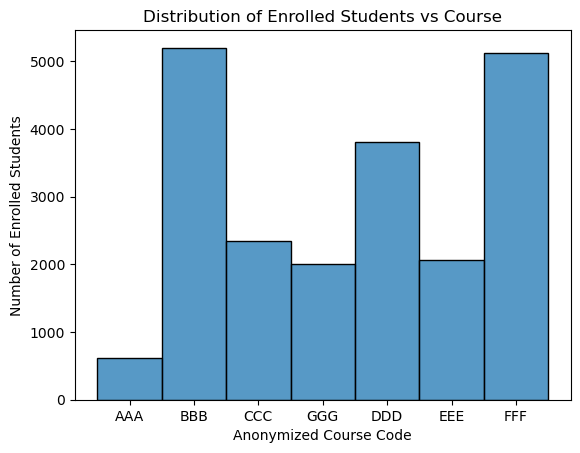

In [32]:
sns.histplot(data=df, x='code_module', stat='count', discrete=True)
plt.xlabel('Anonymized Course Code')
plt.ylabel('Number of Enrolled Students')
plt.title('Distribution of Enrolled Students vs Course')
plt.show()

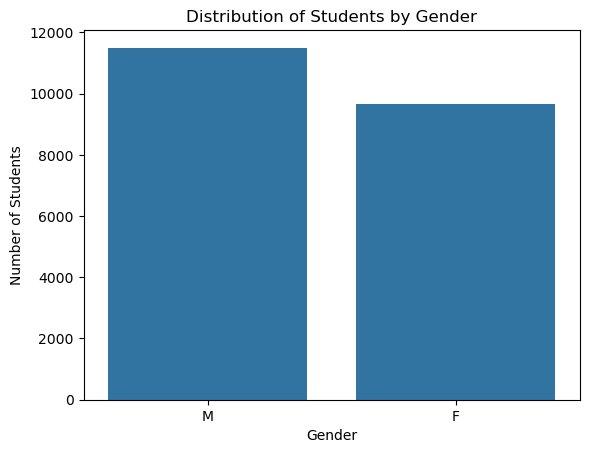

In [33]:
sns.countplot(data=df, x='gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Distribution of Students by Gender')
plt.show()

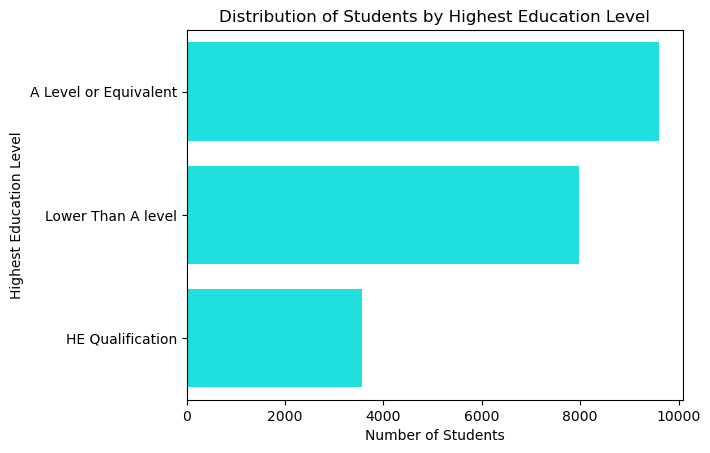

In [34]:
sns.countplot(data=df, y='highest_education', order=df['highest_education'].value_counts().index, color='cyan')
plt.xlabel('Number of Students')
plt.ylabel('Highest Education Level')
plt.title('Distribution of Students by Highest Education Level')
plt.show()

<Axes: xlabel='final_result', ylabel='count'>

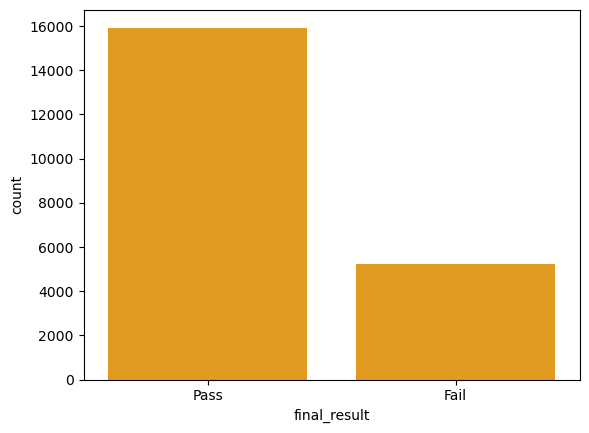

In [35]:
# Grouping the final results together as Pass and Fail
sns.countplot(data=df , x='final_result', order = df['final_result'].value_counts().index, color='orange')

In [36]:
df = df.dropna()

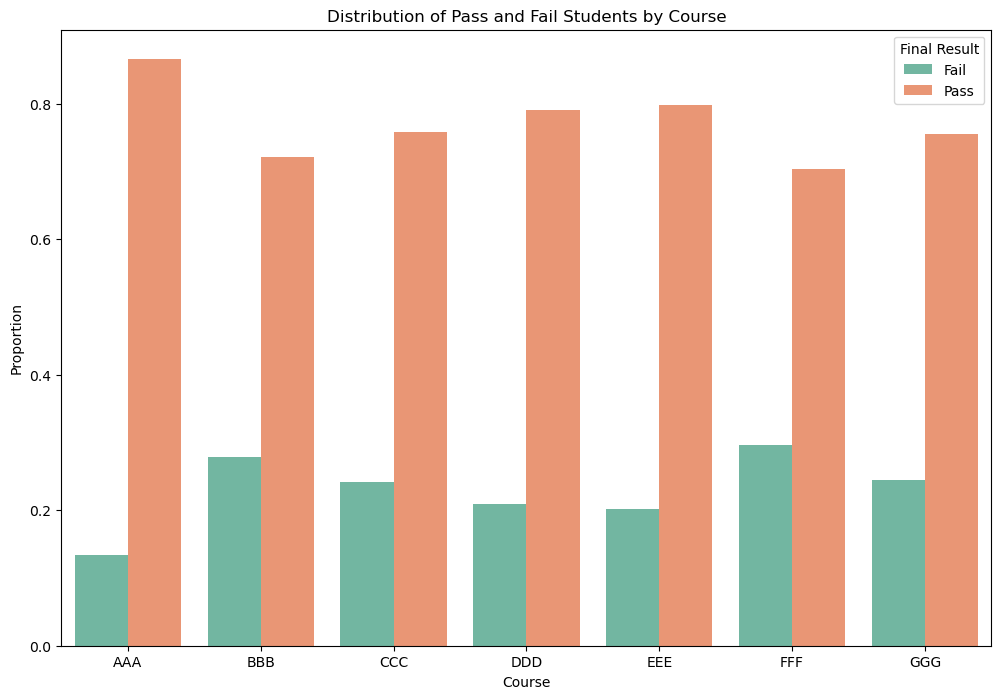

In [37]:
# Transform the data for seaborn
df_grouped = df.groupby(['code_module', 'final_result']).size().reset_index(name='count')
df_grouped['proportion'] = df_grouped.groupby('code_module')['count'].transform(lambda x: x / x.sum())

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the stacked bar plot
sns.barplot(data=df_grouped, x='code_module', y='proportion', hue='final_result', palette='Set2')
plt.title('Distribution of Pass and Fail Students by Course')
plt.xlabel('Course')
plt.ylabel('Proportion')
plt.legend(title='Final Result')
plt.show()

In [38]:
print("Final length of the dataset: ", len(df))

Final length of the dataset:  20290


In [39]:
df.columns

Index(['id_student', 'code_module', 'code_presentation', 'total_score*weight',
       'attempted_weight', 'adjusted_mark', 'mark', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'module_presentation'],
      dtype='object')

In [40]:
df['attempted_weight'].value_counts()

attempted_weight
100.0    10291
200.0     2185
150.0     1044
75.0       745
82.0       523
         ...  
163.0        1
23.5         1
12.0         1
94.0         1
111.0        1
Name: count, Length: 198, dtype: int64

In [41]:
df

,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A level,20-30%,0-35,2,60,N,Fail,BBB_2013B
5,23698,CCC,2014J,10997.0,150.0,73.300000,55.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,120,N,Pass,CCC_2014J
6,23798,BBB,2013J,8924.0,100.0,90.340760,44.6,M,Wales,A Level or Equivalent,50-60%,0-35,0,60,N,Pass,BBB_2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25837,2698251,DDD,2014B,10267.5,200.0,51.300000,51.3,F,South West Region,A Level or Equivalent,50-60%,0-35,0,60,N,Pass,DDD_2014B
25838,2698257,AAA,2013J,6940.0,100.0,52.388959,34.7,M,East Midlands Region,Lower Than A level,60-70%,0-35,0,120,N,Pass,AAA_2013J
25840,2698535,EEE,2013J,5344.0,100.0,43.023477,26.7,M,Wales,Lower Than A level,50-60%,0-35,0,60,N,Pass,EEE_2013J
25841,2698577,BBB,2014J,5580.0,100.0,33.481595,27.9,F,Wales,Lower Than A level,50-60%,35-55,0,60,N,Fail,BBB_2014J


# Understanding the relation between the demographic features and the final result using bnlearn

In [42]:
import bnlearn as bn

In [43]:
features = [
    'code_module',
    'gender',
    'region',
    'highest_education',
    'imd_band',
    'age_band',
    'disability',
    'final_result'  # This is the target
]
df_bn = df[features].copy()

In [44]:
# Making the data categorical to ensure that bnlearn can work with it
for col in df_bn.columns:
    df_bn[col] = df_bn[col].astype('category')

In [45]:
# Let's first use the strucuture learning algorithm to learn the structure of the Bayesian Network
model = bn.structure_learning.fit(df_bn, methodtype='hc')  # Or 'tan', 'cl' for other methods

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


In [46]:
import pygraphviz
print(pygraphviz.__file__)

/home/harshit/anaconda3/envs/ml/lib/python3.12/site-packages/pygraphviz/__init__.py


In [47]:
import pygraphviz
import networkx as nx

print("PyGraphviz:", pygraphviz.__file__)
print("Has pygraphviz layout:", hasattr(nx.nx_agraph, 'graphviz_layout'))

PyGraphviz: /home/harshit/anaconda3/envs/ml/lib/python3.12/site-packages/pygraphviz/__init__.py
Has pygraphviz layout: True


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Warning: [graphviz_layout] layout not found. The layout [spring_layout] is used instead.


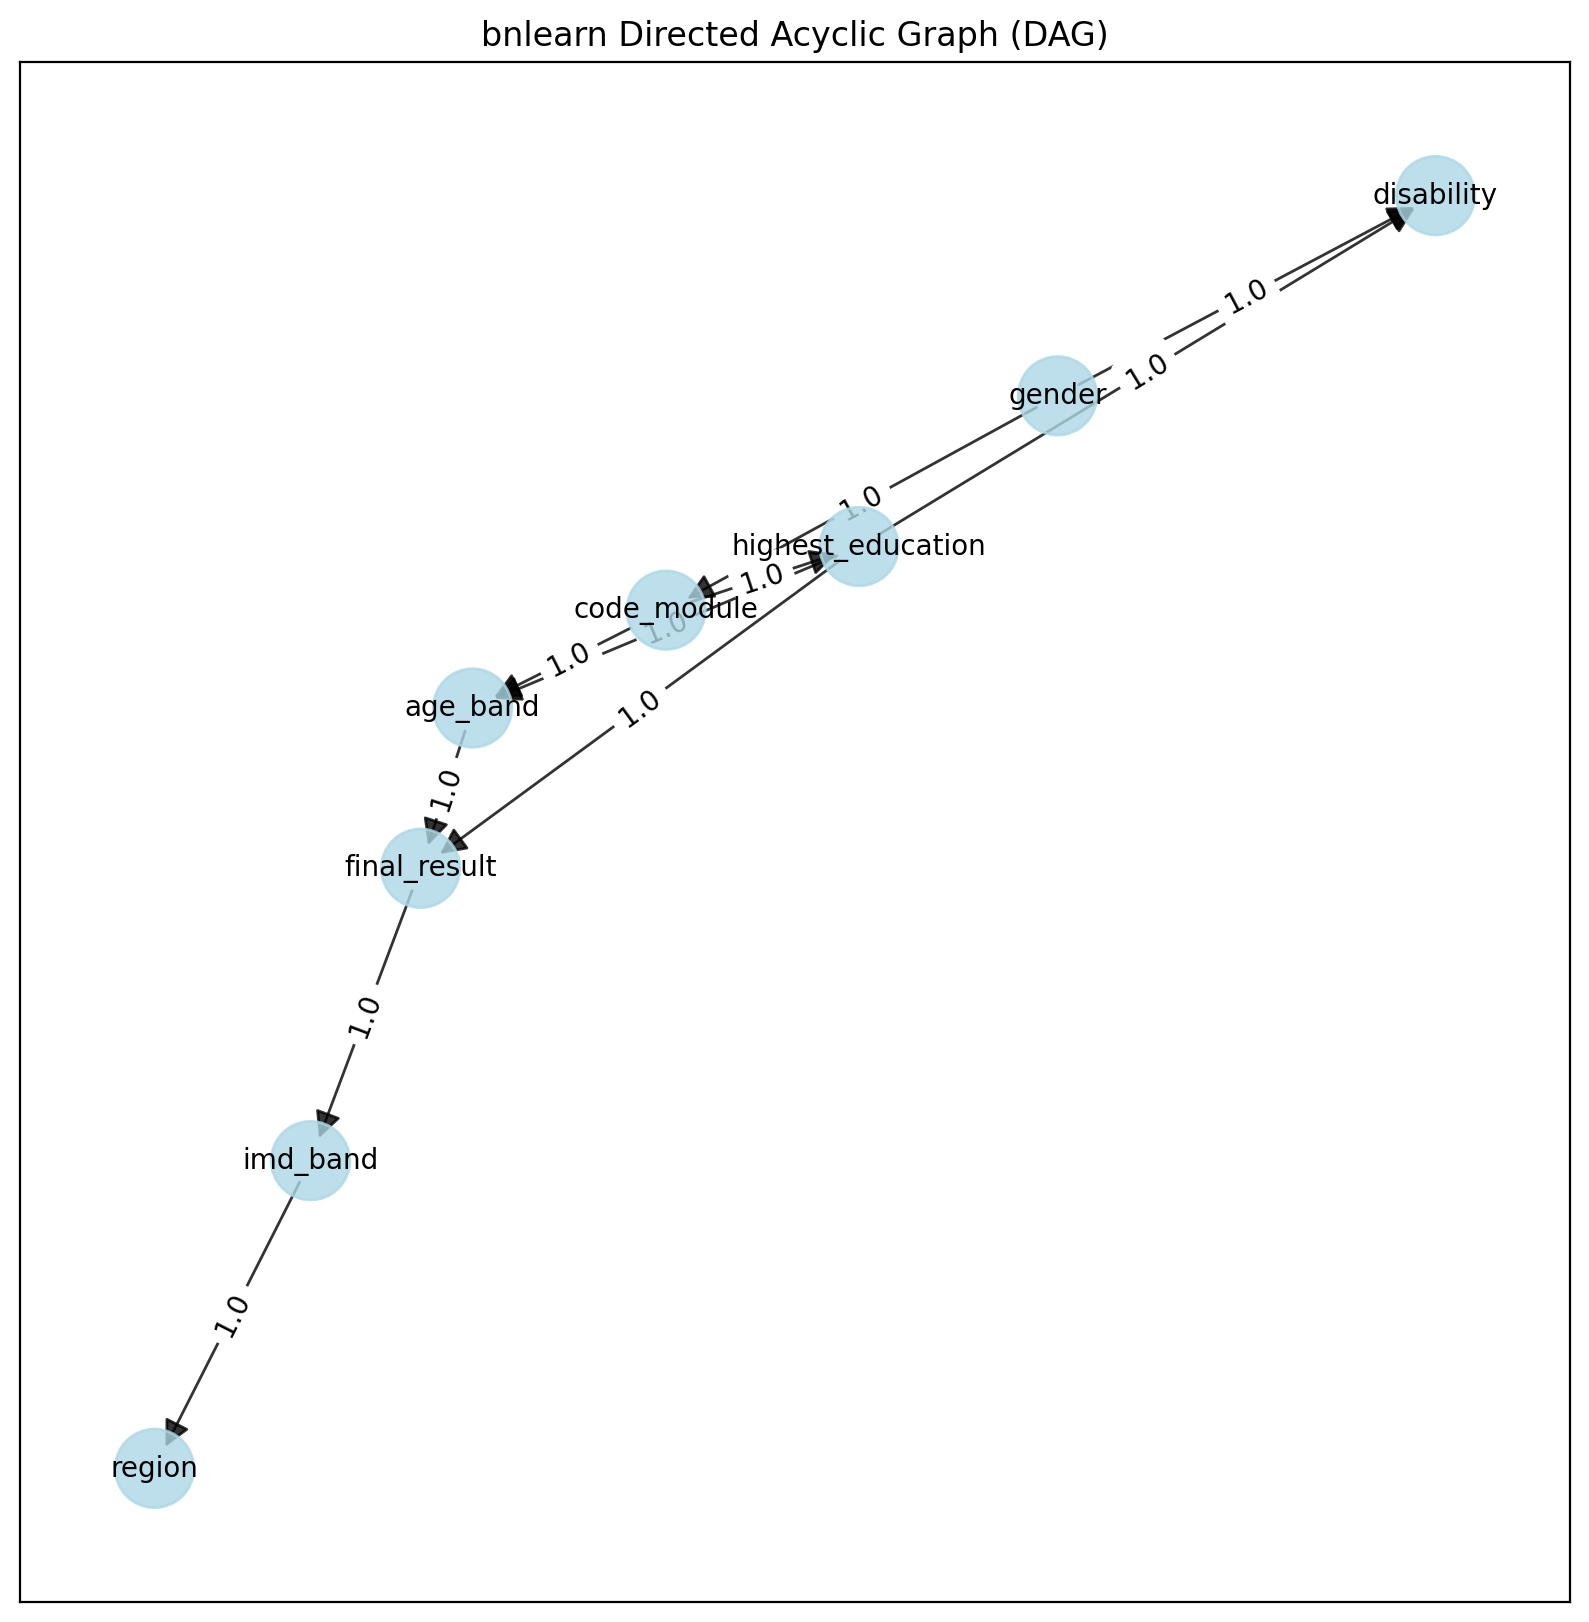

{'fig': <Figure size 2000x2000 with 1 Axes>,
 'ax': <Figure size 2000x2000 with 1 Axes>,
 'pos': {'code_module': array([-0.00788225,  0.14552582]),
  'highest_education': array([0.24504452, 0.21463622]),
  'age_band': array([-0.26132361,  0.03926736]),
  'gender': array([0.50495464, 0.37827508]),
  'disability': array([1.        , 0.59565106]),
  'final_result': array([-0.32938219, -0.1347524 ]),
  'imd_band': array([-0.47351749, -0.45223373]),
  'region': array([-0.67789363, -0.7863694 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x72f38c201580>,
 'node_properties': {'code_module': {'node_color': '#ADD8E6',
   'node_size': 800},
  'gender': {'node_color': '#ADD8E6', 'node_size': 800},
  'region': {'node_color': '#ADD8E6', 'node_size': 800},
  'highest_education': {'node_color': '#ADD8E6', 'node_size': 800},
  'imd_band': {'node_color': '#ADD8E6', 'node_size': 800},
  'age_band': {'node_color': '#ADD8E6', 'node_size': 800},
  'disability': {'node_color': '#ADD8E6', 'node_size': 800}

In [24]:
bn.plot(model)